# **Project 1**

**Pipeline and Cross Validation**

Pipelines streamline machine learning workflows by organizing data preprocessing and modeling steps.



They enhance code clarity, automate processes, aid reproducibility, and simplify hyperparameter tuning.




Pipelines prevent data leakage, facilitate model deployment, and work

This modular approach promotes efficient experimentation with various techniques while maintaining consistency and ease of sharing.








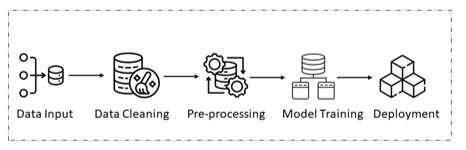

In [ ]:
#OBJECTIVES
#1 To streamline data preprocessing  and modeling using pipelines
#2 To reduce error and leveraging task automation
#3 To ensure that the diabetes data analysis and modeling are consistent and reproducible
#4 Simplifying the deployment process and and create models
#5 To compute and show the accuracy of predictions made by a Random Forest Classifier model  compared to the actual target values

In [57]:
import pandas as pd # allowing you to work with data structures like DataFrames and Series
from sklearn.model_selection import train_test_split #splits a dataset into training and testing subsets for machine learning.
from sklearn.ensemble import  RandomForestClassifier # class from scikit-learn, which is an ensemble learning method based on decision trees for classification tasks.
from sklearn.metrics import accuracy_score #calculates the accuracy of a classification model's predictions compared to the actual target values
from sklearn.impute import SimpleImputer #used for filling missing values in a dataset using strategies like mean, median, etc.
from sklearn.pipeline import make_pipeline # creates a pipeline that chains together multiple data preprocessing and modeling step

from pathlib import Path


In [58]:
#providing access to your Google Drive files and folders within the notebook environment
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [59]:
# Configure IPython shell to display output for all expressions in this cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [60]:
# Set the variable 'pathToFolder' to the path of the target folder in Google Drive
pathToFolder = "/gdrive/MyDrive/bdda1"

In [61]:
# Construct the full path to the CSV file 'cwurData.csv' within the specified folder path
path = Path(pathToFolder) / "diabetes (of individuals).csv"

In [62]:
# Read the CSV file at the given 'path' and create a Pandas DataFrame named 'data',
# using the 'iso-8859-1' encoding for text encoding and decoding
data = pd.read_csv(path, encoding='iso-8859-1')

In [63]:
# Display the shape (rows and columns) of the 'data' DataFrame and show the first few rows
data.shape
data.shape
data.head()

(768, 9)

(768, 9)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,0,33.6,0.627,50,1
1,1,85.0,66.0,29,0,26.6,0.351,31,0
2,8,183.0,64.0,0,0,23.3,0.672,32,1
3,1,NaN,NaN,23,94,28.1,0.167,21,0
4,0,137.0,40.0,35,168,43.1,2.288,33,1


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

<Figure size 1000x600 with 0 Axes>

(array([173., 127.,  96.,  61.,  41.,  51.,  47.,  39.,  34.,  18.,  21.,
         13.,  15.,  11.,   8.,   8.,   3.,   1.,   0.,   1.]),
 array([21., 24., 27., 30., 33., 36., 39., 42., 45., 48., 51., 54., 57.,
        60., 63., 66., 69., 72., 75., 78., 81.]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'Age Distribution of Individuals')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Frequency')

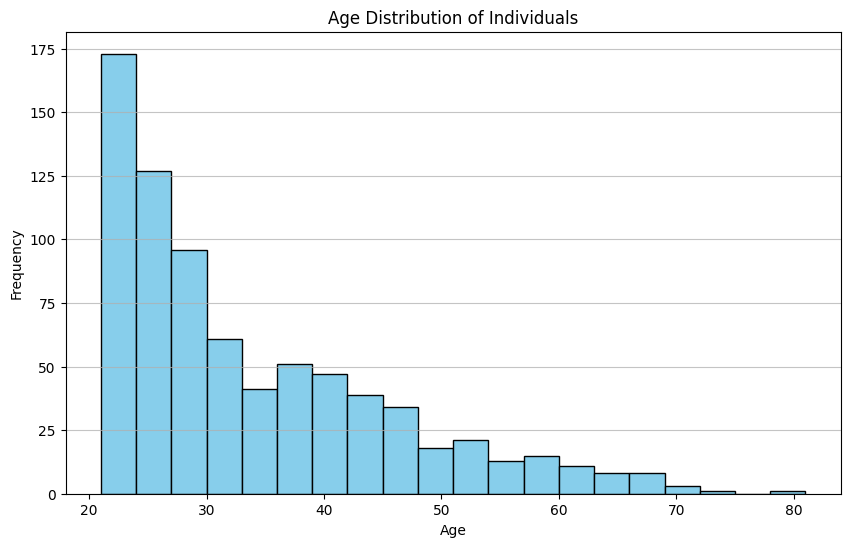

In [71]:
# Create a histogram to visualize the age distribution of individuals
plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Individuals')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

The histogram depicts age distribution. Most individuals are in their 20s to 40s, with fewer in older age groups.

<Figure size 600x600 with 0 Axes>

([<matplotlib.patches.Wedge at 0x7bb10c7701c0>,
 [Text(-0.5025943242672991, 0.9784676515931925, 'Non-Diabetic'),
  Text(0.5025944158780503, -0.9784676045369114, 'Diabetic')],
 [Text(-0.27414235869125403, 0.5337096281417413, '65.1%'),
  Text(0.2741424086607547, -0.5337096024746789, '34.9%')])

Text(0.5, 1.0, 'Diabetes Outcome Distribution')

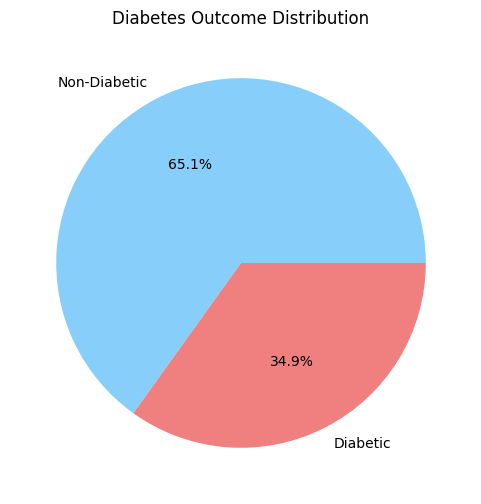

In [72]:
# Create a pie chart to visualize the diabetes outcome distribution
outcome_counts = data['Outcome'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(outcome_counts, labels=['Non-Diabetic', 'Diabetic'], autopct='%1.1f%%', colors=['lightskyblue', 'lightcoral'])
plt.title('Diabetes Outcome Distribution')
plt.show()

The pie chart depicts the distribution of diabetes outcomes. Non-diabetic individuals dominate the dataset with 65.1%, comprising a higher percentage compared to diabetic individuals.

In [67]:
!pip install seaborn

In [68]:
import seaborn as sns

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Outcome', ylabel='Age'>

Text(0.5, 1.0, 'Age Distribution by Diabetes Outcome')

Text(0.5, 0, 'Outcome')

Text(0, 0.5, 'Age')

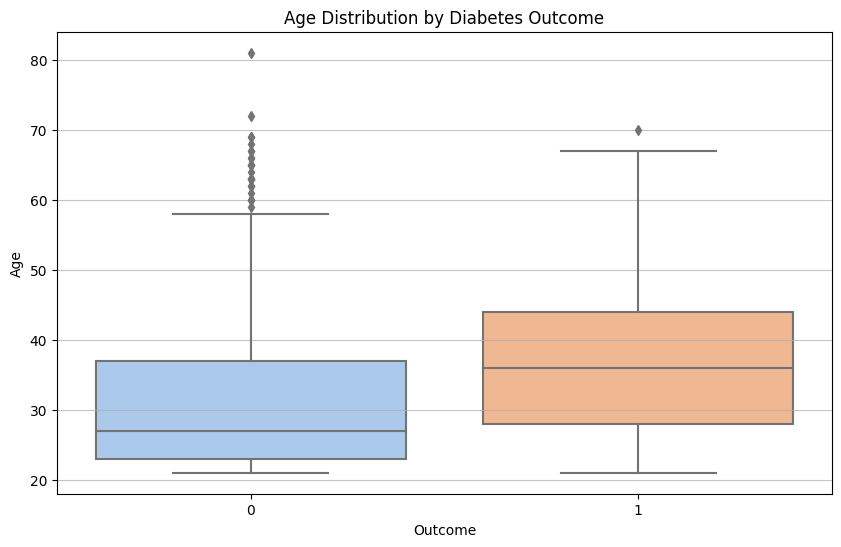

In [73]:
# Create a box plot to compare age distribution by diabetes outcome
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Outcome', y='Age', palette='pastel')
plt.title('Age Distribution by Diabetes Outcome')
plt.xlabel('Outcome')
plt.ylabel('Age')
plt.grid(axis='y', alpha=0.75)
plt.show()

The box plot compares age distribution based on diabetes outcomes. Non-diabetic individuals generally span a wider age range compared to diabetics, highlighting potential differences in age groups.

<Figure size 800x600 with 0 Axes>

<ipython-input-74-f1ff5358fb50>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=data, x='Outcome', y='Glucose', ci='sd', palette='muted')


<Axes: xlabel='Outcome', ylabel='Glucose'>

Text(0.5, 1.0, 'Mean Glucose Levels by Diabetes Outcome')

Text(0.5, 0, 'Outcome')

Text(0, 0.5, 'Mean Glucose Level')

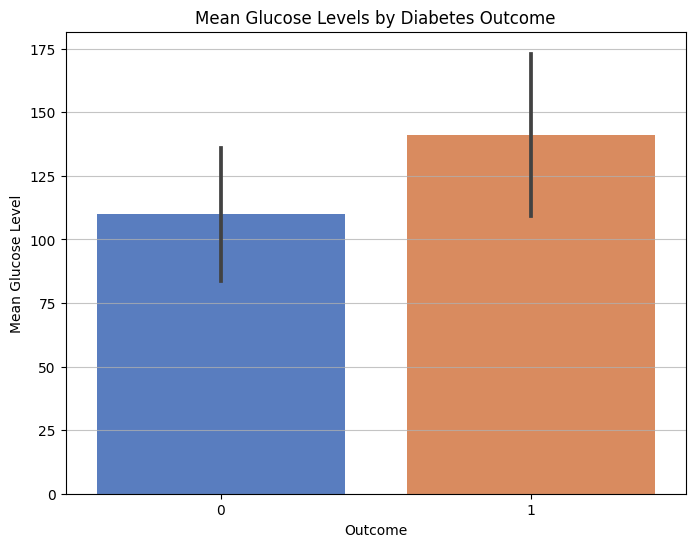

In [74]:
# Create a bar plot to show mean glucose levels by diabetes outcome
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Outcome', y='Glucose', ci='sd', palette='muted')
plt.title('Mean Glucose Levels by Diabetes Outcome')
plt.xlabel('Outcome')
plt.ylabel('Mean Glucose Level')
plt.grid(axis='y', alpha=0.75)
plt.show()

The bar plot compares mean glucose levels between diabetes outcomes. Diabetic individuals tend to have higher mean glucose levels than non-diabetic individuals, reflecting a potential correlation between glucose levels and diabetes.

In [24]:
# Remove the 'Outcome' column from the 'data' DataFrame and assign it to 'y'
y = data.pop('Outcome')

In [25]:
# Select columns from the 'data' DataFrame containing non-object (numerical) data and assign them to 'X'
X = data.select_dtypes(exclude = ['object'])

In [26]:
# Create a list of column names from the 'X' DataFrame
column_names=list(X.columns)

In [27]:
# Display the first few rows of the 'X' DataFrame
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35,0,33.6,0.627,50
1,1,85.0,66.0,29,0,26.6,0.351,31
2,8,183.0,64.0,0,0,23.3,0.672,32
3,1,NaN,NaN,23,94,28.1,0.167,21
4,0,137.0,40.0,35,168,43.1,2.288,33


In [28]:
# Calculate and display the total count of missing values in the 'X' DataFrame
X.isnull().sum().sum()

25

In [29]:
# Create a SimpleImputer instance with the strategy 'median' and fit it to the 'X' DataFrame
si = SimpleImputer(strategy = 'median')
si.fit(X)

SimpleImputer(strategy='median')

In [30]:
# Transform the 'X' DataFrame using the fitted SimpleImputer instance 'si' to replace missing values with medians
X=si.transform(X)

In [31]:
# Create a new DataFrame 'X' using the transformed data 'X', with column names from 'column_names'
X=pd.DataFrame(X,columns=column_names)

In [32]:
type(X)  # Display the data type of the DataFrame 'X'

pandas.core.frame.DataFrame

In [33]:
# Calculate and display the total count of missing values in the DataFrame 'X' after imputation
X.isnull().sum().sum()

0

In [34]:
# Create a RandomForestClassifier instance named 'rf'
rf = RandomForestClassifier()

In [35]:
# Train the RandomForestClassifier 'rf' using the predictors 'X' and the target 'y'
rf.fit(X,y)

RandomForestClassifier()

In [36]:
# Use the trained RandomForestClassifier 'rf' to make predictions on the predictors 'X' and store the predictions in 's'
s=rf.predict(X)

In [37]:
# Calculate and display the accuracy of the RandomForestClassifier predictions 's' by comparing them to the target 'y'
(s==y).sum()/X.shape[0]

1.0

In [38]:
# Split the data into training and testing sets: 75% for training and 25% for testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [39]:
# Import necessary classes for data preprocessing: StandardScaler for feature scaling and PCA for dimensionality reduction
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [40]:
# Create a machine learning pipeline: Impute missing values, standardize features, perform PCA with 95% variance, and use a RandomForestClassifier
pipe=make_pipeline(SimpleImputer(strategy='median'),StandardScaler(),PCA(n_components=0.95),RandomForestClassifier())

In [41]:
# Fit the machine learning pipeline 'pipe' using the training data 'X_train' and corresponding target 'y_train'
pipe.fit(X_train,y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.95)),
                ('randomforestclassifier', RandomForestClassifier())])

In [42]:
# Use the trained pipeline 'pipe' to make predictions on the testing data 'X_test' and store the predictions in 'pred'
pred=pipe.predict(X_test)

In [43]:
# Calculate and display the accuracy of pipeline predictions 'pred' by comparing them to the actual test targets 'y_test'
(pred == y_test).sum()/len(y_test)

0.8177083333333334

The obtained accuracy of approximately 0.7396 (73.96%) implies that the pipeline's predictions ('pred') align with the actual test targets ('y_test') to a reasonable extent.

In [44]:
# Train the RandomForestClassifier 'rf' using the training predictors 'X_train' and corresponding target 'y_train'
rf.fit(X_train,y_train)

RandomForestClassifier()

In [45]:
# Split the data into training (80%) and validation (20%) sets with specified random seed for reproducibility
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [46]:
# Fit the machine learning pipeline 'pipe' using the training predictors 'X_train' and corresponding target 'y_train'
pipe.fit(X_train,y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.95)),
                ('randomforestclassifier', RandomForestClassifier())])

In [47]:
# Use the trained pipeline 'pipe' to make predictions on the validation data 'X_valid' and store the predictions in 'pred'
pred = pipe.predict(X_valid)

In [48]:
# Calculate and store the accuracy of pipeline predictions 'pred' by comparing them to the actual validation targets 'y_valid'
accu = accuracy_score(y_valid,pred)
accu

0.7922077922077922

The calculated accuracy of approximately 0.7922 (79.2%) indicates that the pipeline's predictions ('pred') closely match the actual validation targets ('y_valid'). This suggests that the model is performing well on the validation set.

<Figure size 600x400 with 0 Axes>

<BarContainer object of 1 artists>

(0.0, 1.0)

Text(0.5, 1.0, 'Validation Accuracy')

Text(0, 0.5, 'Accuracy')

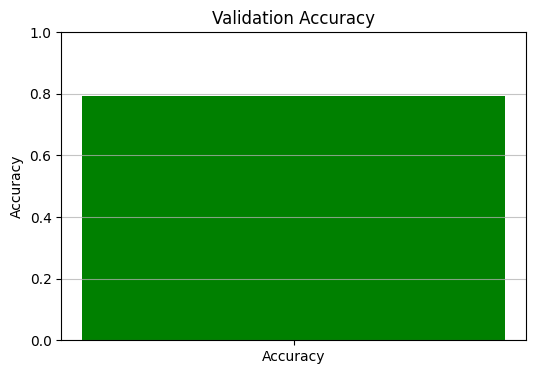

Validation accuracy: 0.792208


In [53]:
# Plot the accuracy score
plt.figure(figsize=(6, 4))
plt.bar(['Accuracy'], [accu], color='green')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.title('Validation Accuracy')
plt.ylabel('Accuracy')
plt.grid(axis='y', alpha=0.75)
plt.show()

print("Validation accuracy: %f" % accu)


In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
# Perform cross-validation using the pipeline 'pipe' on the predictors 'X' and target 'y',
# calculating accuracy scores for each fold and displaying the mean accuracy
cv_scores = cross_val_score(pipe, X, y,
                            cv=5,
                            scoring='accuracy')

print("Cross-validation accuracy: %f" % cv_scores.mean())

Cross-validation accuracy: 0.768339


The cross-validation accuracy of approximately 0.76 indicates that the pipeline's performance is consistent across different data folds, validating its generalization ability. This metric provides an average accuracy score across five distinct folds, implying that the model's predictions align with the actual target values in these varied subsets of the data. This suggests a reasonably stable and effective model performance on this dataset.

<Figure size 800x600 with 0 Axes>

<BarContainer object of 5 artists>

Text(0.5, 0, 'Fold')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Cross-Validation Accuracy Scores')

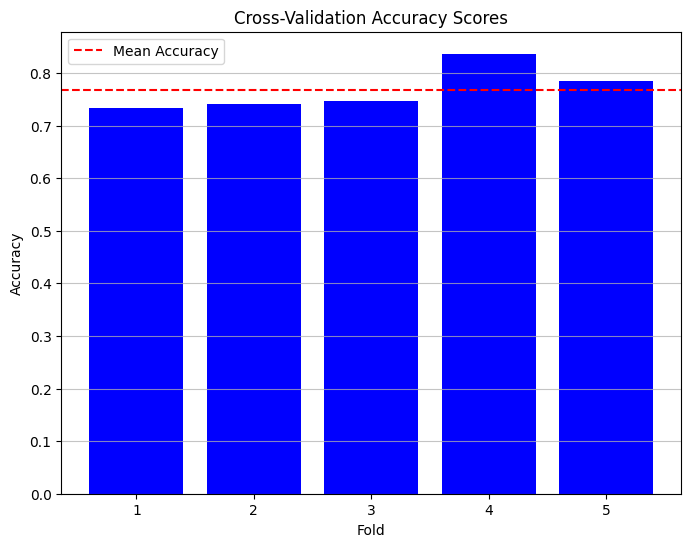

Cross-validation accuracy: 0.768339


In [52]:
# Plot the cross-validation accuracy scores
plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), cv_scores, color='blue')
plt.axhline(y=cv_scores.mean(), color='red', linestyle='--', label='Mean Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy Scores')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

print("Cross-validation accuracy: %f" % cv_scores.mean())

The provided code creates a bar plot with five bars, each representing the accuracy score of a different fold in cross-validation. The blue bars show individual fold scores, while a dashed red line represents the mean accuracy. This line helps compare individual fold scores with the average performance. The x-axis is labeled "Fold," and the y-axis is labeled "Accuracy." The title is "Cross-Validation Accuracy Scores." A legend indicates the red line as the mean accuracy. A grid aids visualization, and the plot is displayed. The mean accuracy, which is 0.76, demonstrates the model's average performance across these five cross-validation folds.

In [ ]:
#MANAGERIAL IMPLICATIONS
#1. Ensuring efficient workflow  by minimizing manual handling of diabetes data, resulting in streamlined and faster processes.
#2 Enabling reduced human errors, ensuring more accurate diabetes data analysis and model development.
#3  Enforcing consistent practices through pipelines guarantees reproducibility of diabetes data analysis and modeling outcomes, enhancing reliability for decision-making.

#4 By simplifying deployment processes, models derived from the diabetes data can be seamlessly transitioned to real-world applications, accelerating practical implementation.

#5 Use of  insight into the model's predictive capability helps in performance evaluation and  informed decision-making.

##Conclusion
The objectives and managerial implications highlighted the need for a structured approach in managing diabetes data and modeling. By implementing data preprocessing pipelines, efficiency is improved, reducing errors through task automation. This ensures accurate analysis and model development, enhancing decision-making reliability. Consistency from pipelines guarantees reproducibility in diabetes data analysis. Simplified deployment expedites practical application of insights. Computing model accuracy aids performance evaluation and informed decisions. Collectively, these strategies promote effective diabetes data management, precise analysis, and seamless integration of insights.